## Importing the Dataset

In [51]:
import pandas as pd

X = pd.read_excel("./Datasets/cleaned_scaled.xlsx")
feats = X.drop(columns=["Churn Value"])
y = X["Churn Value"]
print(X.head())

   Gender  Senior Citizen  Partner  Dependents  Tenure Months  Multiple Lines  \
0       1               0        0           0      -1.236724               0   
1       0               0        0           1      -1.236724               0   
2       0               0        0           1      -0.992402               1   
3       0               0        1           1      -0.177995               1   
4       1               0        0           1       0.677133               1   

   Online Security  Online Backup  Device Protection  Tech Support  ...  \
0                1              1                  0             0  ...   
1                0              0                  0             0  ...   
2                0              0                  1             0  ...   
3                0              0                  1             1  ...   
4                0              1                  1             0  ...   

   Fiber-Optics_Service  DSL_Service  month-to-month_contract 

## Variance Threshold
- Removing any features that have no variation in their values.

In [52]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
print(selector.fit_transform(feats))
print(selector.get_support(indices=True))
num_cols = list(feats.columns[selector.get_support(indices=True)])
print(num_cols)

feats = feats[num_cols]
print(feats.head())

[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'CLTV', 'Fiber-Optics_Service', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod', 'mailed-check_paymentmethod']
   Gender  Senior Citizen  Partner  Dependents  Tenure Months  Multiple Lines  \
0       1               0        0           0      -1.236724               0   
1       0               0        0           1      -1.236724               0   
2       0         

## Pearsons Correlation
- coefficient close to 1 represents positive correlation
- coefficient close to -1 represents negative correlation
- coefficient of 0 represents to correlation

### Correlation between Features


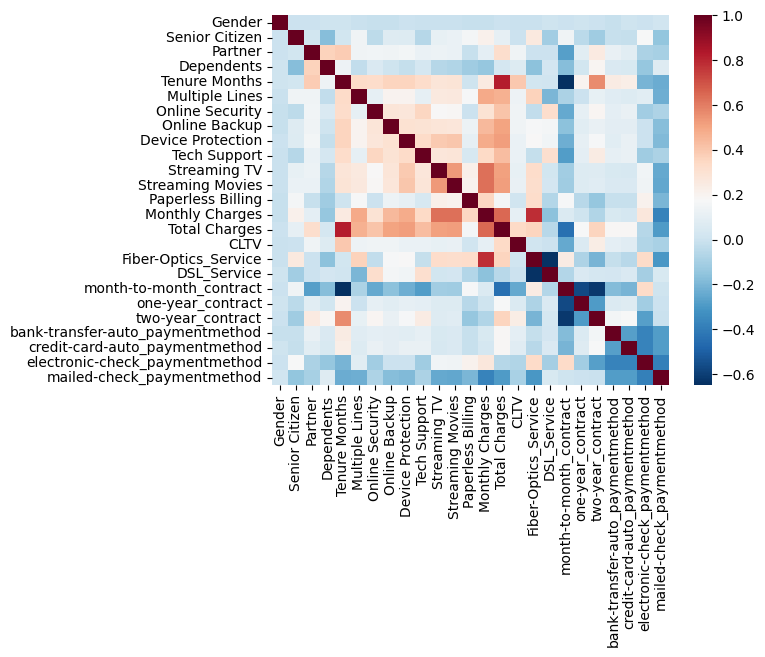

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = feats.corr(method="pearson")
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r')
plt.show()

- Looping over the bottom diagonal of correlation matrix and printing values with high correlation

In [54]:
# loop over bottom diagnal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        #print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

Total Charges Tenure Months 0.8258804609332037
Fiber-Optics_Service Monthly Charges 0.7871948529419357


- Total Charges and Tenure Months are highly positively correlated
- similarly, Fiber-Optics_Service and Monthly Charges are also highly positively correlated
<br><br>
We can choose to remove either one of the two variables with high correlation

### Correlation between Feature and Target

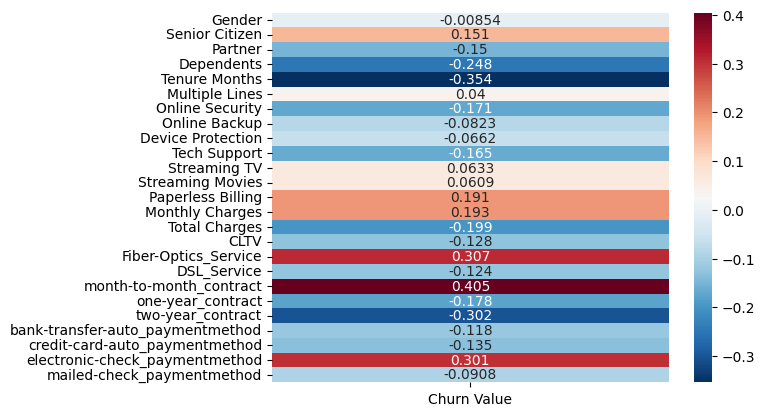

In [55]:
X_feat = feats.copy()
X_feat["Churn Value"] = y

feat_corr_matrix = X_feat.corr()
# isolating the column corresponding to "Churn Value"
corr_target = feat_corr_matrix[["Churn Value"]].drop(labels=["Churn Value"])
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

As we can observe there is no feature which is "Strongly" Correlated with the target

From the above to correlations that we found, we can conclude on removing "Tenure Months" and "Fiber-Optics_Servivce"

In [56]:
X = X.drop(columns=["Tenure Months", "Fiber-Optics_Service"])
print(X.head())

   Gender  Senior Citizen  Partner  Dependents  Multiple Lines  \
0       1               0        0           0               0   
1       0               0        0           1               0   
2       0               0        0           1               1   
3       0               0        1           1               1   
4       1               0        0           1               1   

   Online Security  Online Backup  Device Protection  Tech Support  \
0                1              1                  0             0   
1                0              0                  0             0   
2                0              0                  1             0   
3                0              0                  1             1   
4                0              1                  1             0   

   Streaming TV  ...      CLTV  DSL_Service  month-to-month_contract  \
0             0  ... -0.981675            1                        1   
1             0  ... -1.436462        

### Exporting the filtered features

In [58]:
X = X.to_excel("./Datasets/Filtered_features.xlsx", index=False)